**Task**

Use the archive [iris.csv](data/iris.csv).

Starting from a copy of the previous file (3b), but this time including every feature present in the original file. Running should again display the same graph as in the previous section. Compare these two graphs in the comments below the code.

In [3]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

In [4]:
# Data preprocessing
file_path = 'iris.csv'
label_encoder = LabelEncoder()

# 2 featurs
data2 = pd.read_csv(file_path, usecols=['sepal_length', 'sepal_width', 'species'])

X2 = data2.drop('species', axis=1)        # features
y2 = data2['species']                     # target

# Encode the target labels
y2_encoded = label_encoder.fit_transform(y2)

# Equal number of all 3 types in both data sets (stratify = y)
train2_X, test2_X, train2_y, test2_y = train_test_split(X2, y2_encoded, test_size=0.08, random_state=42, stratify=y2_encoded)

# 4 featurs
data4 = pd.read_csv(file_path)

X4 = data4.drop('species', axis=1)        # features
y4 = data4['species']                     # target

# Encode the target labels
y4_encoded = label_encoder.fit_transform(y4)

# Equal number of all 3 types in both data sets (stratify = y)
train4_X, test4_X, train4_y, test4_y = train_test_split(X4, y4_encoded, test_size=0.08, random_state=42, stratify=y4_encoded)

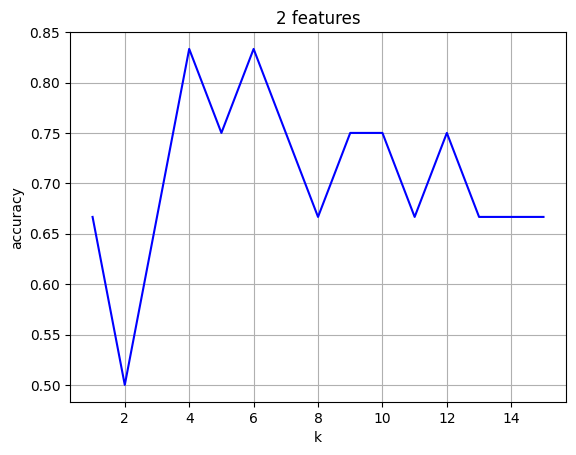

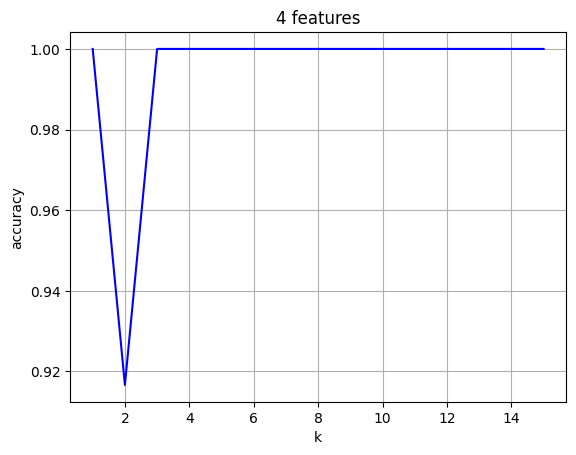

In [6]:
class KNN:
    def __init__(self, nb_features, nb_classes, data, k, weighted=False):
        self.nb_features = nb_features
        self.nb_classes = nb_classes
        self.k = k
        self.weighted = weighted
        self.X = tf.convert_to_tensor(data['x'], dtype=tf.float32)
        self.Y = tf.convert_to_tensor(data['y'], dtype=tf.int32)

    def predict(self, query_data):
        nb_queries = query_data['x'].shape[0]
        matches = 0

        for i in range(nb_queries):
            # pandas DataFrame -> tensor
            query_point = tf.convert_to_tensor(query_data['x'].iloc[i].values, dtype=tf.float32)

            # Euclidean distance from the training point to all other points
            dists = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(self.X, query_point)), axis=1))
            _, idxs = tf.nn.top_k(-dists, self.k)

            classes = tf.gather(self.Y, idxs)
            dists = tf.gather(dists, idxs)

            if self.weighted:
                w = 1 / (dists + 1e-6)                     # + small number to avoid division by zero
            else:
                w = tf.fill([k], 1.0 / self.k)

            w_col = tf.reshape(w, (k, 1))
            classes_one_hot = tf.one_hot(classes, self.nb_classes)
            scores = tf.reduce_sum(w_col * classes_one_hot, axis=0)
            hyp = tf.argmax(scores)

            if query_data.get('y') is not None:
                actual = query_data['y'][i]
                match = (hyp == actual)
                if match:
                    matches += 1

        accuracy = matches / nb_queries if nb_queries > 0 else 0
        return accuracy


nb_features = 2           # sepal_length and sepal_width
nb_classes = 3            # 3 targets
k = 3
train_data_2 = {'x': train2_X, 'y': train2_y}
test_data_2 = {'x': test2_X, 'y': test2_y}

train_data_4 = {'x': train4_X, 'y': train4_y}
test_data_4 = {'x': test4_X, 'y': test4_y}

accuracies_2 = []
accuracies_4 = []

for k in range(1, 16):
  # 2 features
  knn_2 = KNN(nb_features, nb_classes, train_data_2, k)
  accuracy = knn_2.predict(test_data_2)
  accuracies_2.append(accuracy)

  # 4 features
  knn_4 = KNN(nb_features, nb_classes, train_data_4, k)
  accuracy = knn_4.predict(test_data_4)
  accuracies_4.append(accuracy)

plt_2, ax_2 = plt.subplots()
plt_4, ax_4 = plt.subplots()

# Plot graph for 2 features
ax_2.plot(range(1, 16), accuracies_2, linestyle='-', c='blue')
ax_2.set_xlabel('k')
ax_2.set_ylabel('accuracy')
ax_2.set_title('2 features')
ax_2.grid(True)

# Plot graph for 4 features
ax_4.plot(range(1, 16), accuracies_4, linestyle='-', c='blue')
ax_4.set_xlabel('k')
ax_4.set_ylabel('accuracy')
ax_4.set_title('4 features')
ax_4.grid(True)

plt.show()

**Conclusion**

When using 2 features, the highest accuracy for k=4 and k=6 is 0.83.
When using 4 features, given that we are measuring on a very small test dataset (only 12 data points), it makes sense for the accuracy to be 100% for k >= 12. For k=3 to k=11, we can assume that the points are spatially close.